# Lab 2. Simple Linear Regression

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


# 가설과 비용

$$ H(x) = Wx + b $$

## 비용

$$ cost(W)=\frac {1}{m}\sum _{i=1}^{m}({H(x)^{(i)}-y^{(i)})^2} $$

In [12]:
x_data = [1, 2, 3, 4, 5]
y_data = [1, 2, 3, 4, 5]
x_data

[1, 2, 3, 4, 5]

(0.0, 5.3)

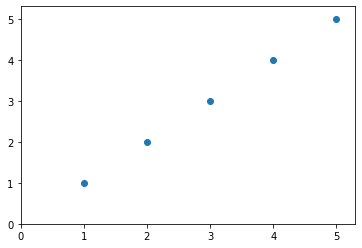

In [17]:
plt.plot(x_data, y_data, 'o')
plt.xlim(0, 5.3)
plt.ylim(0, 5.3)

In [18]:
v = [1., 2., 3., 4.]
tf.reduce_mean(v)

<tf.Tensor: shape=(), dtype=float32, numpy=2.5>

In [19]:
tf.square(3)

<tf.Tensor: shape=(), dtype=int32, numpy=9>

In [20]:
x_data = [1, 2, 3, 4, 5]
y_data = [1, 2, 3, 4, 5]

W = tf.Variable(2.0)
b = tf.Variable(0.5)

hypothesis = W * x_data + b

In [21]:
W.numpy(), b.numpy()

(2.0, 0.5)

In [22]:
hypothesis.numpy()

array([ 2.5,  4.5,  6.5,  8.5, 10.5], dtype=float32)

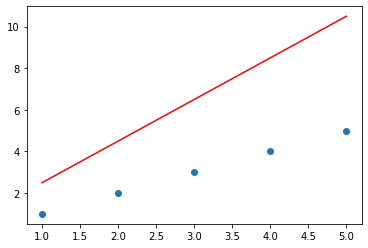

In [23]:
ㅓplt.plot(x_data, hypothesis.numpy(), "r-")
plt.plot(x_data, y_data, 'o')

# 비용

$$ cost(W)=\frac {1}{m}\sum _{i=1}^{m}({H(x)^{(i)}-y^{(i)})^2} $$


In [24]:
cost = tf.reduce_mean(tf.square(hypothesis - y_data))

In [26]:
with tf.GradientTape() as tape:
  hypothesis = W * x_data + b
  cost = tf.reduce_mean(tf.square(hypothesis - y_data))

W_grad, b_grad = tape.gradient(cost, [W, b])

In [28]:
W_grad.numpy(), b_grad.numpy()

(25.0, 7.0)

## Gradient

$$ \frac{dx}{dy} $$

$$ \frac{dcost}{dW} $$

$$ \frac{dcost}{db} $$


In [29]:
# 변수 업데이트

In [30]:
learning_rate = 0.01

W.assign_sub(learning_rate * W_grad)
b.assign_sub(learning_rate * b_grad)

W.numpy(), b.numpy()

(1.75, 0.43)

In [36]:
W = tf.Variable(3.0)
b = tf.Variable(1.0)

for i in range(2000):
  with tf.GradientTape() as tape:
    hypothesis = W * x_data + b
    cost = tf.reduce_mean(tf.square(hypothesis - y_data))

  W_grad, b_grad = tape.gradient(cost, [W, b])
  W.assign_sub(learning_rate * W_grad)
  b.assign_sub(learning_rate * b_grad)
  if i % 100 == 0:
    print("{:5}|{:10.4f}|{:10.4f}|{:10.6f}".format(i, W.numpy(), b.numpy(), cost))


    0|    2.5000|    0.8600| 57.000000
  100|    0.9185|    0.2942|  0.015866
  200|    0.9419|    0.2097|  0.008060
  300|    0.9586|    0.1495|  0.004094
  400|    0.9705|    0.1065|  0.002080
  500|    0.9790|    0.0759|  0.001056
  600|    0.9850|    0.0541|  0.000537
  700|    0.9893|    0.0386|  0.000273
  800|    0.9924|    0.0275|  0.000138
  900|    0.9946|    0.0196|  0.000070
 1000|    0.9961|    0.0140|  0.000036
 1100|    0.9972|    0.0100|  0.000018
 1200|    0.9980|    0.0071|  0.000009
 1300|    0.9986|    0.0051|  0.000005
 1400|    0.9990|    0.0036|  0.000002
 1500|    0.9993|    0.0026|  0.000001
 1600|    0.9995|    0.0018|  0.000001
 1700|    0.9996|    0.0013|  0.000000
 1800|    0.9997|    0.0009|  0.000000
 1900|    0.9998|    0.0007|  0.000000
